## Linear Regression Model training and EDA

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [25]:
## reading data
sales = pd.read_csv("C:/Users/Pratik/Desktop/Internship/raw data/sales_data.csv", encoding='latin1')
pd.set_option('display.max_columns', None)
sales.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [26]:
## feature extraction
sales = sales.drop(['Row ID', 'Order ID', 'Ship Date', 'Customer ID', 'Customer Name','Product ID','Country','Postal Code', 'Ship Mode', 'Segment', 'City','State', 'Sub-Category','Quantity'], axis=1)


In [27]:
sales.head()

,Order Date,Region,Category,Product Name,Sales,Discount,Profit
0,11/8/2016,South,Furniture,Bush Somerset Collection Bookcase,261.9600,0.00,41.9136
1,11/8/2016,South,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,0.00,219.5820
2,6/12/2016,West,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,0.00,6.8714
3,10/11/2015,South,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,0.45,-383.0310
4,10/11/2015,South,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,0.20,2.5164


In [28]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    9994 non-null   object 
 1   Region        9994 non-null   object 
 2   Category      9994 non-null   object 
 3   Product Name  9994 non-null   object 
 4   Sales         9994 non-null   float64
 5   Discount      9994 non-null   float64
 6   Profit        9994 non-null   float64
dtypes: float64(3), object(4)
memory usage: 546.7+ KB


In [29]:
sales.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,229.858001,0.156203,28.656896
std,623.245101,0.206452,234.260108
min,0.444000,0.000000,-6599.978000
25%,17.280000,0.000000,1.728750
50%,54.490000,0.200000,8.666500
75%,209.940000,0.200000,29.364000
max,22638.480000,0.800000,8399.976000


In [30]:
## data cleaning 

print(sales.isnull().sum())

Order Date      0
Region          0
Category        0
Product Name    0
Sales           0
Discount        0
Profit          0
dtype: int64


In [32]:
print(sales.duplicated().sum())

3


In [33]:
sales.drop_duplicates(inplace=True)
print("Removed Duplicates :")
print(sales.duplicated().sum())

Removed Duplicates :
0


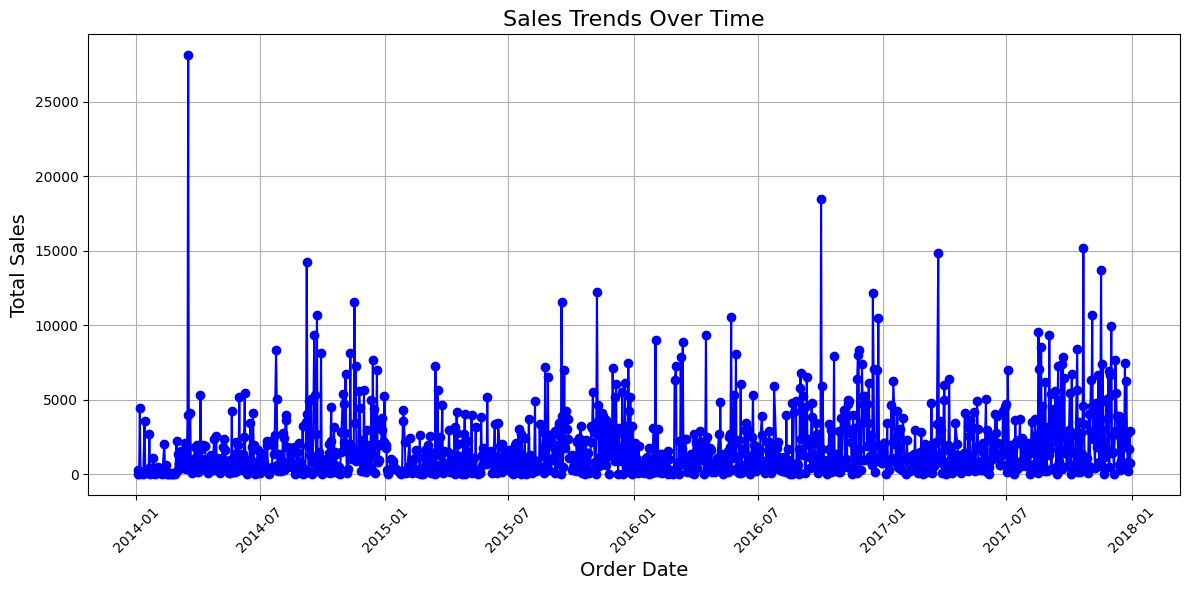

In [41]:
## Sales trends over time (time series plot)

sales['Order Date'] = pd.to_datetime(sales['Order Date'])

sales_trends = sales.groupby('Order Date')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(sales_trends['Order Date'], sales_trends['Sales'], marker='o', linestyle='-', color='blue')
plt.title('Sales Trends Over Time', fontsize=16)
plt.xlabel('Order Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


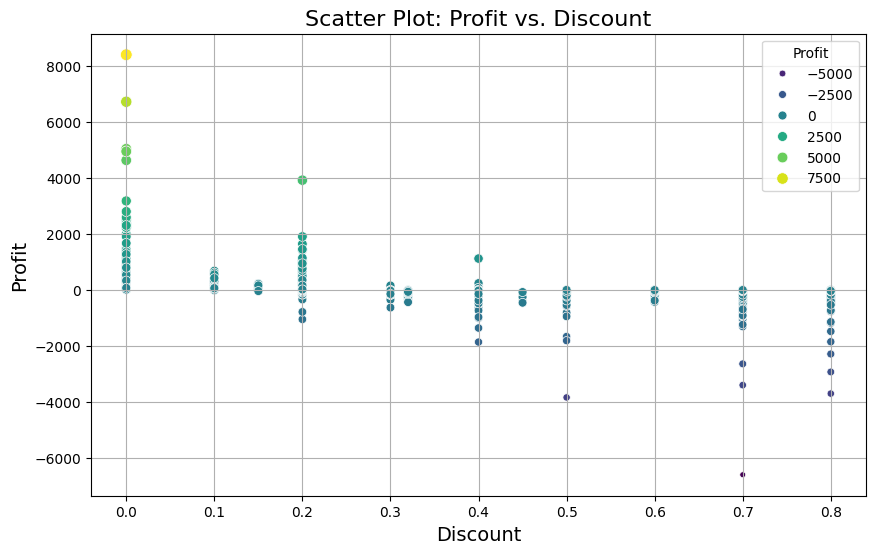

In [45]:
## Scatter plot showing Profit vs Discount using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=sales, hue='Profit', palette='viridis', size='Profit')
plt.title('Scatter Plot: Profit vs. Discount', fontsize=16)
plt.xlabel('Discount', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.grid(True)
plt.legend(title='Profit')
plt.show()

In [46]:
## Bar and pie charts showing Sales by Region and Category
sales_by_region = sales.groupby('Region')['Sales'].sum().reset_index()
sales_by_category = sales.groupby('Category')['Sales'].sum().reset_index()

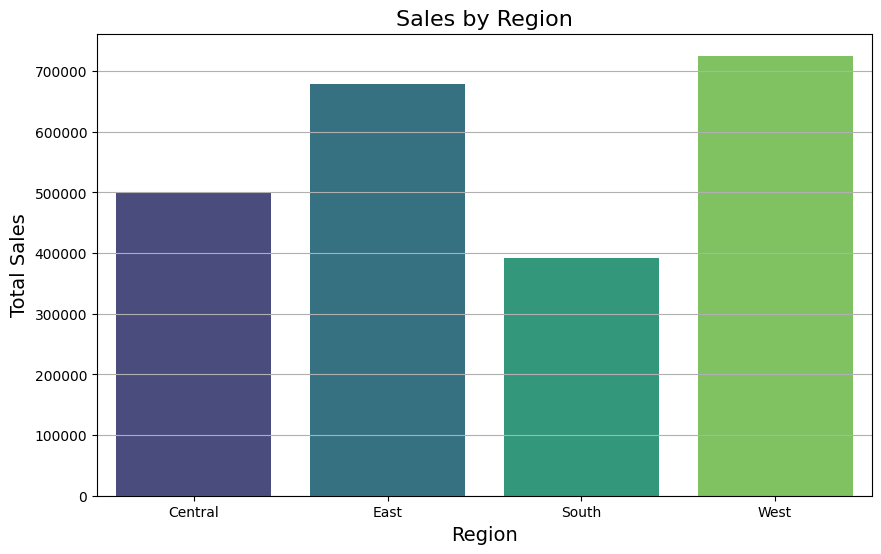

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=sales_by_region, palette='viridis')
plt.title('Sales by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(axis='y')
plt.show()

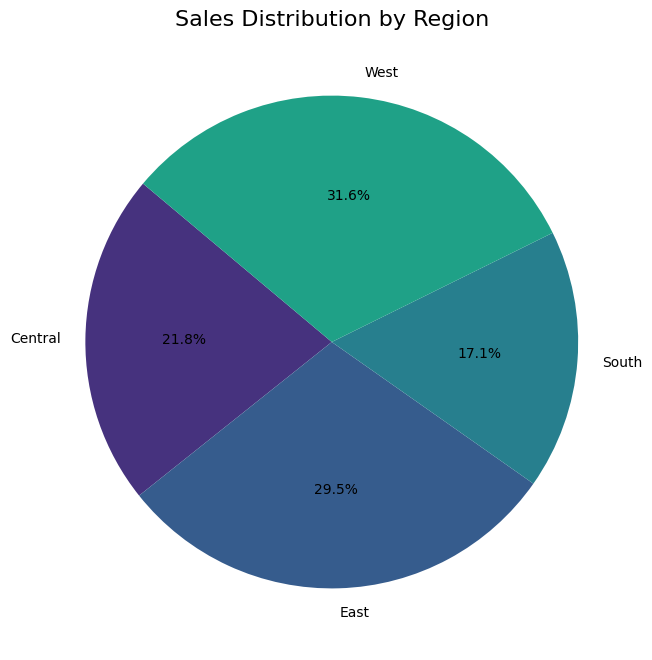

In [48]:
plt.figure(figsize=(8, 8))
plt.pie(sales_by_region['Sales'], labels=sales_by_region['Region'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Sales Distribution by Region', fontsize=16)
plt.show()


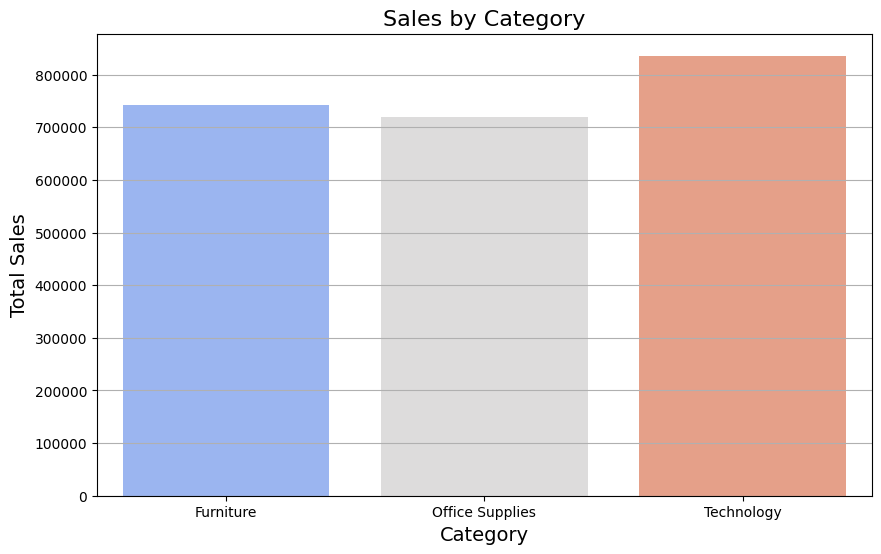

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=sales_by_category, palette='coolwarm')
plt.title('Sales by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(axis='y')
plt.show()

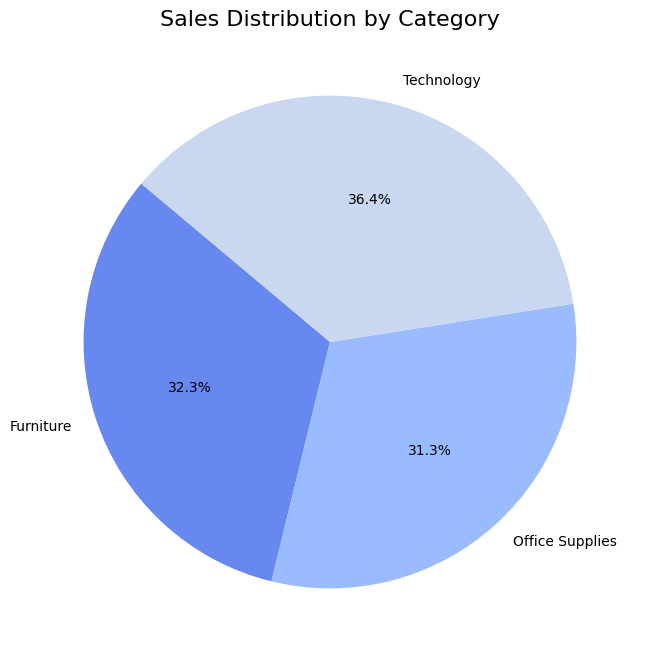

In [50]:
plt.figure(figsize=(8, 8))
plt.pie(sales_by_category['Sales'], labels=sales_by_category['Category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm'))
plt.title('Sales Distribution by Category', fontsize=16)
plt.show()

Mean Squared Error: 1277616.925253319
R^2 Score: nan
Model Coefficients: [  -2.69593181 -634.15162485]
Model Intercept: 193.60091903322865


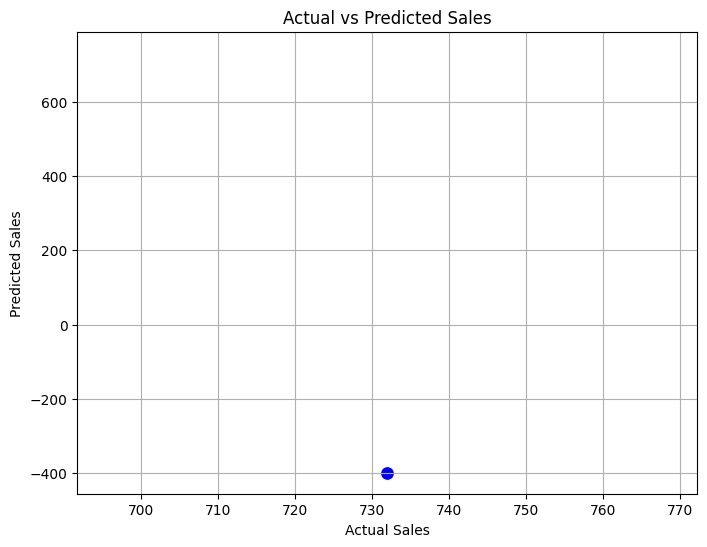

In [82]:
## linear regression model buildup and training

df = pd.DataFrame({
    'Profit': [41.9136, 219.5820, 6.8714, -383.0310, 2.5164],  
    'Discount': [0.00, 0.00, 0.00, 0.45, 0.20],               
    'Sales': [261.9600, 731.9400, 14.6200, 957.5775, 22.3680]  
})

X = df[['Profit', 'Discount']]
y = df['Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

#Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid()
plt.show()


